In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import os
import matplotlib.image as mpimg
import random

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabunbalt","key":"a4a307b915fed712cdee4e9fddddd88e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sabunbalt/107-sports-image-classification

Dataset URL: https://www.kaggle.com/datasets/sabunbalt/107-sports-image-classification
License(s): MIT
 99% 407M/410M [00:03<00:00, 155MB/s]
100% 410M/410M [00:03<00:00, 122MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/107-sports-image-classification.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = "/content/sports_classification_dataset/train"
test_dir = "/content/sports_classification_dataset/test"
val_dir = "/content/sports_classification_dataset/valid"

In [ ]:
for dirpath, dirnames, filenames in os.walk(train_dir):
  print(f"'{dirpath.removeprefix('/content/sports_classification_dataset/train/')}',")

'/content/sports_classification_dataset/train',
'bike polo',
'hammer throw',
'rugby',
'boxing',
'giant slalom',
'rowing',
'archery',
'disc golf',
'cricket',
'ice climbing',
'wheelchair racing',
'bull riding',
'air hockey',
'pole climbing',
'rollerblade racing',
'water polo',
'table tennis',
'horse jumping',
'polo',
'ampute football',
'motorcycle racing',
'speed skating',
'surfing',
'field hockey',
'ski jumping',
'hydroplane racing',
'shooting',
'chuckwagon racing',
'track bicycle',
'wingsuit flying',
'frisbee',
'horseshoe pitching',
'harness racing',
'snow boarding',
'football',
'high jump',
'snowmobile racing',
'bungee jumping',
'rock climbing',
'balance beam',
'croquet',
'golf',
'steer wrestling',
'canoe slamon',
'shot put',
'tug of war',
'jousting',
'roller derby',
'log rolling',
'luge',
'chess',
'water cycling',
'cheerleading',
'formula 1 racing',
'swimming',
'lacrosse',
'skydiving',
'bobsled',
'bowling',
'gaga',
'ultimate',
'fly fishing',
'baseball',
'hockey',
'fencing',
'basketba

In [ ]:
CLASS_NAMES = ['bike polo',
'hammer throw',
'rugby',
'boxing',
'giant slalom',
'rowing',
'archery',
'disc golf',
'cricket',
'ice climbing',
'wheelchair racing',
'bull riding',
'air hockey',
'pole climbing',
'rollerblade racing',
'water polo',
'table tennis',
'horse jumping',
'polo',
'ampute football',
'motorcycle racing',
'speed skating',
'surfing',
'field hockey',
'ski jumping',
'hydroplane racing',
'shooting',
'chuckwagon racing',
'track bicycle',
'wingsuit flying',
'frisbee',
'horseshoe pitching',
'harness racing',
'snow boarding',
'football',
'high jump',
'snowmobile racing',
'bungee jumping',
'rock climbing',
'balance beam',
'croquet',
'golf',
'steer wrestling',
'canoe slamon',
'shot put',
'tug of war',
'jousting',
'roller derby',
'log rolling',
'luge',
'chess',
'water cycling',
'cheerleading',
'formula 1 racing',
'swimming',
'lacrosse',
'skydiving',
'bobsled',
'bowling',
'gaga',
'ultimate',
'fly fishing',
'baseball',
'hockey',
'fencing',
'basketball',
'olympic wrestling',
'american football',
'pole vault',
'volleyball',
'hurdles',
'hang gliding',
'nascar racing',
'bmx',
'billiards',
'tennis',
'wwe',
'barell racing',
'shuffleboard',
'weightlifting',
'figure skating women',
'uneven bars',
'arm wrestling',
'parallel bar',
'horse racing',
'figure skating pairs',
'wheelchair basketball',
'judo',
'axe throwing',
'gymnastics',
'pommel horse',
'sumo wrestling',
'javelin',
'kabaddi',
'badminton',
'curling',
'ice yachting',
'baton twirling',
'mushing',
'pole dancing',
'rings',
'sky surfing',
'figure skating men',
'sailboat racing',
'jai alai',
'sidecar racing',
'trapeze']

In [ ]:
len(CLASS_NAMES)

107

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed = 69)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed = 69)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed = 69)

Found 15122 files belonging to 107 classes.
Found 571 files belonging to 107 classes.
Found 570 files belonging to 107 classes.


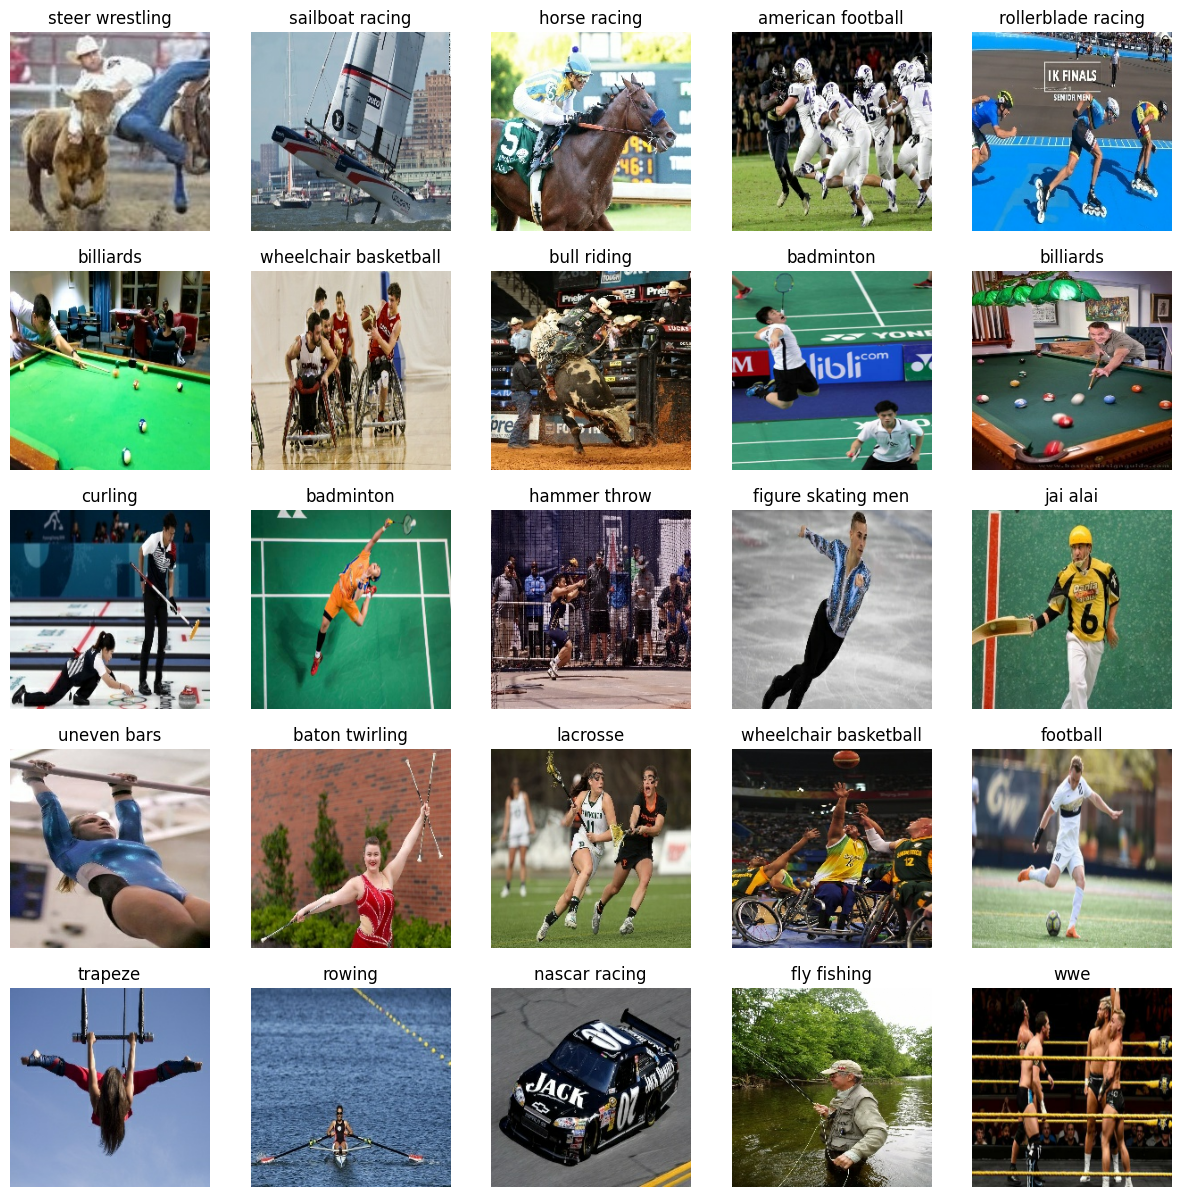

In [ ]:
plt.figure(figsize= (15, 15))

for images, labels in train_data.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis('off')

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

Image shape: (280, 500, 3)


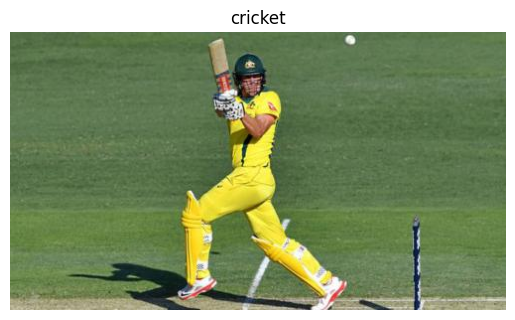

In [ ]:
view_random_image("/content/sports_classification_dataset/train/", "cricket")

In [ ]:
data_augmentation_layer_rescaling = tf.keras.models.Sequential([
                layers.RandomFlip('horizontal'),
                layers.RandomContrast(0.2),
                layers.RandomHeight(0.2),
                layers.RandomWidth(0.2),
                layers.Resizing(224, 224),
                layers.Rescaling(1./255)
])

data_augmentation_layer = tf.keras.models.Sequential([
                layers.RandomFlip('horizontal'),
                layers.RandomContrast(0.2),
                layers.RandomHeight(0.2),
                layers.RandomWidth(0.2),
                layers.Resizing(224, 224)
])

In [ ]:
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_accuracy',
                                            verbose = 0,
                                            save_best_only = True)

In [ ]:
inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')

x = data_augmentation_layer_rescaling(inputs)

x = layers.Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 64, kernel_size= 3, activation = 'relu')(x)
x = layers.MaxPool2D(pool_size = 2)(x)

x = layers.Flatten()(x)

outputs = layers.Dense(units = 107, activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs, outputs, name = 'model_1')

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

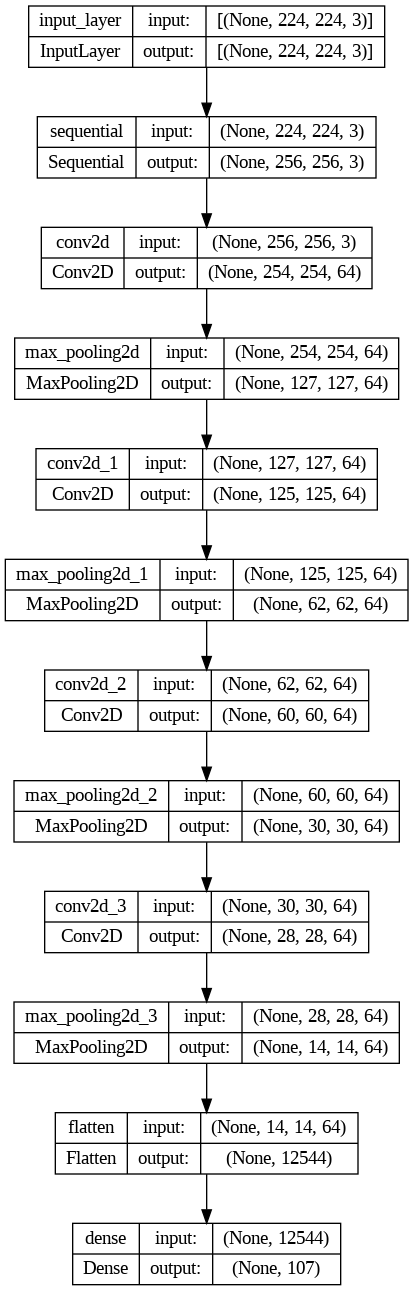

In [ ]:
from keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [ ]:
model_1_history = model_1.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = val_data,
                              callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/5
467/467 [==============================] - 60s 107ms/step - loss: 3.9365 - accuracy: 0.1106 - val_loss: 3.1083 - val_accuracy: 0.2469
Epoch 2/5
467/467 [==============================] - 48s 102ms/step - loss: 2.8798 - accuracy: 0.3026 - val_loss: 2.4978 - val_accuracy: 0.3730
Epoch 3/5
467/467 [==============================] - 45s 96ms/step - loss: 2.2818 - accuracy: 0.4342 - val_loss: 2.4095 - val_accuracy: 0.4063
Epoch 4/5
467/467 [==============================] - 43s 93ms/step - loss: 1.8482 - accuracy: 0.5350 - val_loss: 2.3936 - val_accuracy: 0.4203
Epoch 5/5
467/467 [==============================] - 44s 92ms/step - loss: 1.4463 - accuracy: 0.6336 - val_loss: 2.4487 - val_accuracy: 0.4221


In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1')
model_1.evaluate(test_data)

18/18 [==============================] - 2s 79ms/step - loss: 2.3927 - accuracy: 0.4544


[2.392735004425049, 0.4543859660625458]

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = IMG_SIZE + (3,), name = 'input_layer')
x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(units = 107, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs, outputs, name = 'model_2')

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model_2_history = model_2.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = val_data,
                              callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/5
473/473 [==============================] - 71s 128ms/step - loss: 1.2194 - accuracy: 0.7768 - val_loss: 0.4017 - val_accuracy: 0.9387
Epoch 2/5
473/473 [==============================] - 57s 120ms/step - loss: 0.3218 - accuracy: 0.9384 - val_loss: 0.2649 - val_accuracy: 0.9527
Epoch 3/5
473/473 [==============================] - 58s 123ms/step - loss: 0.1944 - accuracy: 0.9666 - val_loss: 0.2170 - val_accuracy: 0.9545
Epoch 4/5
473/473 [==============================] - 57s 120ms/step - loss: 0.1313 - accuracy: 0.9808 - val_loss: 0.1909 - val_accuracy: 0.9615
Epoch 5/5
473/473 [==============================] - 58s 122ms/step - loss: 0.0940 - accuracy: 0.9883 - val_loss: 0.1765 - val_accuracy: 0.9650


In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2')
model_2.evaluate(test_data)

18/18 [==============================] - 4s 144ms/step - loss: 0.1387 - accuracy: 0.9649


[0.13870130479335785, 0.9649122953414917]

In [ ]:
base_model = tf.keras.applications.MobileNetV2(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = IMG_SIZE + (3,), name = 'input_layer')
x = data_augmentation_layer_rescaling(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(units = 107, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs, outputs, name = 'model_3')

model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_3_history = model_3.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = val_data,
                              callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/5
467/467 [==============================] - 46s 92ms/step - loss: 1.5388 - accuracy: 0.6388 - val_loss: 0.6111 - val_accuracy: 0.8371
Epoch 2/5
467/467 [==============================] - 41s 88ms/step - loss: 0.5433 - accuracy: 0.8578 - val_loss: 0.4943 - val_accuracy: 0.8494
Epoch 3/5
467/467 [==============================] - 42s 88ms/step - loss: 0.3729 - accuracy: 0.9036 - val_loss: 0.4359 - val_accuracy: 0.8634
Epoch 4/5
467/467 [==============================] - 41s 87ms/step - loss: 0.2711 - accuracy: 0.9349 - val_loss: 0.4119 - val_accuracy: 0.8704
Epoch 5/5
467/467 [==============================] - 41s 87ms/step - loss: 0.2100 - accuracy: 0.9515 - val_loss: 0.4140 - val_accuracy: 0.8757


In [ ]:
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3')
model_3.evaluate(test_data)

18/18 [==============================] - 4s 97ms/step - loss: 0.3435 - accuracy: 0.9035


[0.34354087710380554, 0.9035087823867798]

In [ ]:
# It looks like the EfficientNetB0 model performing the best uptil now
# Let's try to fine tune it

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

inputs = layers.Input(shape = IMG_SIZE + (3,), name = 'input_layer')
x = data_augmentation_layer(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(units = 107, activation = 'softmax')(x)

model_2_fine_tune = tf.keras.Model(inputs, outputs, name = 'model_2_fine_tune')

model_2_fine_tune.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

0 input_12 False
1 rescaling_21 False
2 normalization_9 False
3 rescaling_22 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [ ]:
model_2_fine_tune_history = model_2_fine_tune.fit(train_data,
                              epochs = 10,
                              steps_per_epoch = len(train_data),
                              validation_data = val_data,
                              initial_epoch = model_2_history.epoch[-1],
                              callbacks = [create_model_checkpoint(model_name = model_2_fine_tune.name)])

Epoch 5/10
467/467 [==============================] - 75s 145ms/step - loss: 2.7952 - accuracy: 0.5103 - val_loss: 1.0717 - val_accuracy: 0.7968
Epoch 6/10
467/467 [==============================] - 65s 139ms/step - loss: 1.0480 - accuracy: 0.8195 - val_loss: 0.5287 - val_accuracy: 0.8897
Epoch 7/10
467/467 [==============================] - 61s 131ms/step - loss: 0.6621 - accuracy: 0.8673 - val_loss: 0.3806 - val_accuracy: 0.9177
Epoch 8/10
467/467 [==============================] - 66s 141ms/step - loss: 0.4932 - accuracy: 0.9001 - val_loss: 0.3108 - val_accuracy: 0.9335
Epoch 9/10
467/467 [==============================] - 64s 137ms/step - loss: 0.3920 - accuracy: 0.9195 - val_loss: 0.2676 - val_accuracy: 0.9422
Epoch 10/10
467/467 [==============================] - 60s 128ms/step - loss: 0.3219 - accuracy: 0.9333 - val_loss: 0.2355 - val_accuracy: 0.9492


In [ ]:
model_2_fine_tune = tf.keras.models.load_model('/content/model_experiments/model_2_fine_tune')
model_2_fine_tune.evaluate(test_data)

18/18 [==============================] - 4s 68ms/step - loss: 0.1745 - accuracy: 0.9561


[0.17454122006893158, 0.9561403393745422]

In [ ]:
base_model = tf.keras.applications.EfficientNetB2(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = IMG_SIZE + (3,), name = 'input_layer')
x = data_augmentation_layer(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(units = 107, activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs, outputs, name = 'model_4')

model_4.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

31790344/31790344 [==============================] - 0s 0us/step


In [ ]:
model_4_history = model_4.fit(train_data,
                              epochs = 5,
                              steps_per_epoch = len(train_data),
                              validation_data = val_data,
                              callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/5
467/467 [==============================] - 103s 196ms/step - loss: 1.3201 - accuracy: 0.7536 - val_loss: 0.4229 - val_accuracy: 0.9177
Epoch 2/5
467/467 [==============================] - 83s 177ms/step - loss: 0.3787 - accuracy: 0.9193 - val_loss: 0.2846 - val_accuracy: 0.9457
Epoch 3/5
467/467 [==============================] - 48s 101ms/step - loss: 0.2418 - accuracy: 0.9502 - val_loss: 0.2423 - val_accuracy: 0.9405
Epoch 4/5
467/467 [==============================] - 48s 101ms/step - loss: 0.1694 - accuracy: 0.9685 - val_loss: 0.2221 - val_accuracy: 0.9457
Epoch 5/5
467/467 [==============================] - 89s 190ms/step - loss: 0.1242 - accuracy: 0.9809 - val_loss: 0.2102 - val_accuracy: 0.9510


In [ ]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4')
model_4.evaluate(test_data)

18/18 [==============================] - 5s 163ms/step - loss: 0.1527 - accuracy: 0.9544


[0.1527448296546936, 0.9543859362602234]

In [ ]:

model_2.save("107_sports_vision_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import accuracy_score
imgs, y_true = [], []
for img, label in test_data:
    imgs.append(img)
    y_true.append(label)

imgs = tf.concat(imgs, axis=0)
y_true = np.argmax(tf.concat(y_true, axis=0), axis=1)

y_pred = np.argmax(model_2.predict(imgs), axis=1)
print (accuracy_score(y_true, y_pred))

18/18 [==============================] - 52s 3s/step
0.9508771929824561


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model_2.predict(imgs)
roc_auc_score(y_true, y_pred_proba, multi_class='ovr')

18/18 [==============================] - 59s 3s/step


0.9997071020948285

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
class_names = test_data.class_names
class_names[:10]

['ultimate',
 'bowling',
 'basketball',
 'olympic wrestling',
 'tug of war',
 'shot put',
 'wheelchair racing',
 'badminton',
 'sumo wrestling',
 'football']

In [ ]:
make_confusion_matrix(y_true,
                      y_pred,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

                       precision    recall  f1-score   support

             ultimate       1.00      0.80      0.89         5
              bowling       1.00      0.80      0.89         5
           basketball       0.83      1.00      0.91         5
    olympic wrestling       1.00      1.00      1.00         5
           tug of war       1.00      1.00      1.00         5
             shot put       1.00      1.00      1.00         5
    wheelchair racing       1.00      1.00      1.00         5
            badminton       1.00      0.90      0.95        10
       sumo wrestling       1.00      1.00      1.00         5
             football       0.91      1.00      0.95        10
              cricket       0.83      1.00      0.91         5
            skydiving       1.00      1.00      1.00         5
 figure skating women       0.56      1.00      0.71         5
         table tennis       1.00      0.80      0.89         5
                 luge       1.00      1.00      1.00  

In [ ]:
classification_report_dict = classification_report(y_true, y_pred, output_dict=True)
classification_report_dict

{'0': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.888888888888889,
  'support': 5},
 '1': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.888888888888889,
  'support': 5},
 '2': {'precision': 0.8333333333333334,
  'recall': 1.0,
  'f1-score': 0.9090909090909091,
  'support': 5},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '7': {'precision': 1.0,
  'recall': 0.9,
  'f1-score': 0.9473684210526316,
  'support': 10},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 '9': {'precision': 0.9090909090909091,
  'recall': 1.0,
  'f1-score': 0.9523809523809523,
  'support': 10},
 '10': {'precision': 0.8333333333333334,
  'recall': 1.0,
  'f1-score': 0.9090909090909091,
  'support': 5},
 '11': {'precision': 1.0, 'recall': 

In [ ]:
class_f1_scores = {}
for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'ultimate': 0.888888888888889,
 'bowling': 0.888888888888889,
 'basketball': 0.9090909090909091,
 'olympic wrestling': 1.0,
 'tug of war': 1.0,
 'shot put': 1.0,
 'wheelchair racing': 1.0,
 'badminton': 0.9473684210526316,
 'sumo wrestling': 1.0,
 'football': 0.9523809523809523,
 'cricket': 0.9090909090909091,
 'skydiving': 1.0,
 'figure skating women': 0.7142857142857143,
 'table tennis': 0.888888888888889,
 'luge': 1.0,
 'snow boarding': 0.888888888888889,
 'rowing': 1.0,
 'disc golf': 1.0,
 'snowmobile racing': 1.0,
 'ice climbing': 1.0,
 'sky surfing': 1.0,
 'harness racing': 1.0,
 'shuffleboard': 1.0,
 'bmx': 0.888888888888889,
 'bobsled': 1.0,
 'canoe slamon': 1.0,
 'judo': 0.9090909090909091,
 'jousting': 1.0,
 'lacrosse': 0.888888888888889,
 'steer wrestling': 1.0,
 'bike polo': 1.0,
 'ice yachting': 1.0,
 'wheelchair basketball': 1.0,
 'speed skating': 1.0,
 'track bicycle': 1.0,
 'hang gliding': 1.0,
 'field hockey': 1.0,
 'billiards': 1.0,
 'baseball': 0.888888888888889,
 '

In [ ]:
# Classes with least F1 scores
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=True)
f1_scores.head(10)

class_name  f1-score
61             gymnastics  0.461538
12   figure skating women  0.714286
66                  rings  0.714286
104               trapeze  0.750000
77   figure skating pairs  0.750000
65           balance beam  0.769231
53                frisbee  0.800000
79      motorcycle racing  0.833333
71             pole vault  0.888889
93          pole climbing  0.888889

In [ ]:
pred_df = pd.DataFrame({"y_true": y_true,
                        "y_pred": y_pred,
                        "y_true_classname": [class_names[i] for i in y_true],
                        "y_pred_classname": [class_names[i] for i in y_pred]})
pred_df.head()

y_true  y_pred y_true_classname y_pred_classname
0      83      83  wingsuit flying  wingsuit flying
1      52      52          mushing          mushing
2      78      78           boxing           boxing
3      87      87         shooting         shooting
4      28      28         lacrosse         lacrosse

In [ ]:
# Getting the wrong predictions
wrong_pred_df = pred_df[pred_df["y_true"] != pred_df["y_pred"]]
wrong_pred_df

y_true  y_pred      y_true_classname      y_pred_classname
14      104      12               trapeze  figure skating women
76        1      75               bowling                  gaga
77       94      98     hydroplane racing       sailboat racing
80       61      66            gymnastics                 rings
88       62      67                hockey          parallel bar
97       15      63         snow boarding          giant slalom
124      61      65            gymnastics          balance beam
168      93     103         pole climbing          axe throwing
176      61      60            gymnastics           uneven bars
181      77      12  figure skating pairs  figure skating women
198      61      66            gymnastics                 rings
251      23      79                   bmx     motorcycle racing
252       0       9              ultimate              football
266      51      53    horseshoe pitching               frisbee
269      61      65            gymnastics          balance beam
283     100      79        sidecar racing     motorcycle racing
289      13      69          table tennis               kabaddi
292      46      26               fencing                  judo
306      61      66            gymnastics                 rings
312      38      10              baseball               cricket
360       7      40             badminton                tennis
396      53      12               frisbee  figure skating women
399      61      65            gymnastics          balance beam
406      28     106              lacrosse     american football
431      48       2          cheerleading            basketball
458     104      66               trapeze                 rings
479      71      39            pole vault             high jump
498      77      12  figure skating pairs  figure skating women

In [ ]:
# Testing the model

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/107_sports_vision_model.h5")

In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=False):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
import matplotlib.pyplot as plt
def predict_image(filepath):
  plt.figure(figsize = (10, 7))
  img = load_and_prep_image(filepath)
  pred_prob = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[tf.argmax(pred_prob[0])]
  plt.imshow(img/255.)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 170ms/step


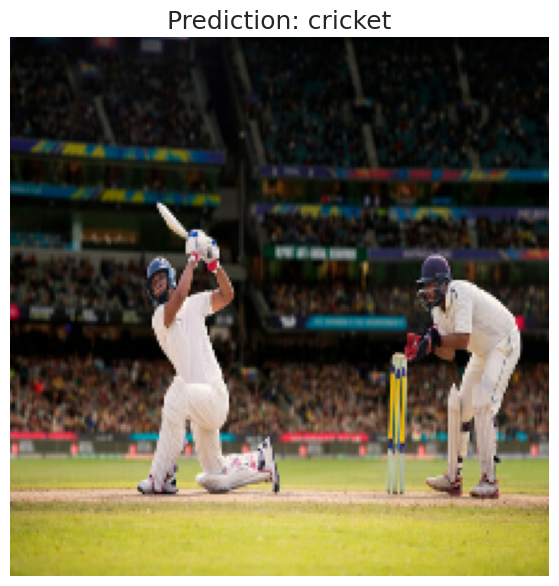

In [ ]:
predict_image("/content/360_F_448703360_Yl1j5l882016Uzmo52mqGx2eu9h07Apt.jpg")

1/1 [==============================] - 0s 185ms/step


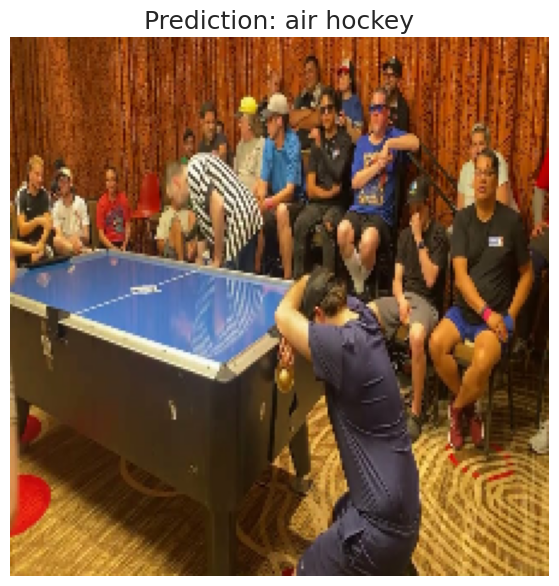

In [ ]:
predict_image("/content/maxresdefault (1).jpg")

1/1 [==============================] - 0s 151ms/step


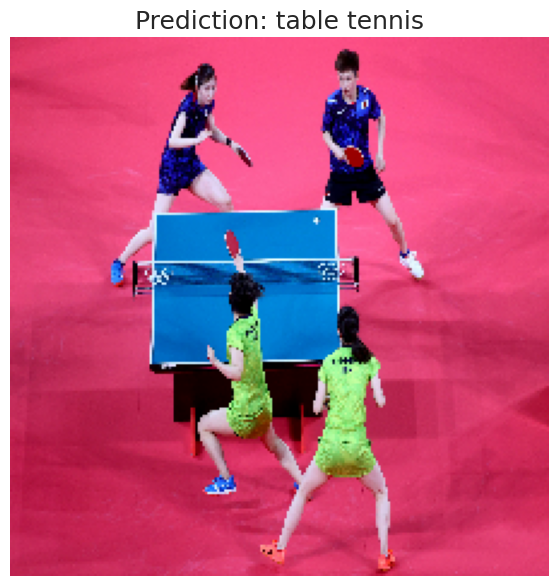

In [ ]:
predict_image("/content/WSHO5BKPHZJM7A4KPAPVYDX3P4.jpg")